## ML Challenge WS 2022/23

#### Task:

Your Task is to train a clickbait filter to classify clickbait articles by their headline. You freely decide how to prepare the data and which ML model to use for classification.

The challenge is considered passed if your model performs better than our baseline (a simple classifier; F1 ~0.89). Report at least the F1 score of your classifier. Your model will be evaluated using a hold out dataset. Please prepare a script so your trained model can be evaluated with this dataset.

#### Dataset:

The data consists of two files, a text file with clickbait headlines and one with headlines from news sources. The hold out dataset is organized the same way.

### Data Load

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

random = 42

import os
print(os.listdir())

['.DS_Store', 'Yadav_AkashKumar_1620629_MLChallenge.ipynb', 'clickbait_yes', 'challenge.ipynb', 'clickbait_hold_X.csv', '.ipynb_checkpoints', 'clickbait_no']


In [2]:
text = [line.rstrip() for line in open('clickbait_yes')]
print(len(text))

14335


In [3]:
for text_no, txt in enumerate(text[:10]):
    print(text_no, txt)
    print('\n')

0 Guys Try Tinder


1 Michael B. Jordan Got Laid The Fuck Out While Filming "Creed"


2 What's The Most Fucked Up Thing You've Done On "Rollercoaster Tycoon"


3 How Far Would You Make It In The Hunger Games


4 If Matthew Gray Gubler's Tweets Were Motivational Posters


5 Here's What Everyone Wore To The Glamour Women Of The Year Awards


6 How Many Of These Black Sitcoms Have You Seen


7 17 Reasons You Should Love Eddie Redmayne


8 Here's What Lady Gaga's Next Album Should Sound Like, According To Her Little Monsters


9 Are These People Smiling At A Baby Or A Laptop




In [4]:
clickbait_yes = pd.read_csv('clickbait_yes',sep='\t',names=["text", "label"])
clickbait_yes["label"] = ["yes"]*len(clickbait_yes)
clickbait_no = pd.read_csv('clickbait_no',sep='\t',names=["text", "label"])
clickbait_no["label"] = ["no"]*len(clickbait_no)
clickbait = pd.concat([clickbait_yes, clickbait_no], axis=0)
clickbait["text"] = clickbait["text"].apply(lambda x: x.lower())
clickbait.head()

,text,label
0,guys try tinder,yes
1,michael b. jordan got laid the fuck out while ...,yes
2,what's the most fucked up thing you've done on...,yes
3,how far would you make it in the hunger games,yes
4,if matthew gray gubler's tweets were motivatio...,yes


### Exploratory Data Analysis

In [5]:
clickbait.describe()

,text,label
count,28800,28800
unique,28800,2
top,guys try tinder,no
freq,1,14465


In [6]:
clickbait.groupby('label').describe()

text                                                               
       count unique                                                top freq
label                                                                      
no     14465  14465  soccer provides oasis in mexican city ravaged ...    1
yes    14335  14335                                    guys try tinder    1

In [7]:
clickbait['length'] = clickbait['text'].apply(len)
clickbait.head()

,text,label,length
0,guys try tinder,yes,15
1,michael b. jordan got laid the fuck out while ...,yes,61
2,what's the most fucked up thing you've done on...,yes,69
3,how far would you make it in the hunger games,yes,45
4,if matthew gray gubler's tweets were motivatio...,yes,57


### Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

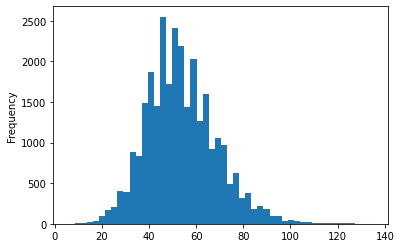

In [9]:
clickbait['length'].plot(bins=50, kind='hist')

In [10]:
clickbait.length.describe()

count    28800.000000
mean        53.779722
std         14.772486
min          6.000000
25%         44.000000
50%         52.000000
75%         63.000000
max        135.000000
Name: length, dtype: float64

In [11]:
print(clickbait[clickbait['length']==135]['text'].iloc[0],'\n')
print(clickbait[clickbait['length']==135]['label'].iloc[0])

common sense advisory announces size of worldwide translation and localization market and ranking of top 20 language services companies 

no


### Text Pre-processing

In [12]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/akash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [14]:
'''
def text_process(mess):
    text = mess.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    
    nopunc = [char for char in words if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
'''

'\ndef text_process(mess):\n    text = mess.split()\n    words = ""\n    for i in text:\n            stemmer = SnowballStemmer("english")\n            words += (stemmer.stem(i))+" "\n    \n    nopunc = [char for char in words if char not in string.punctuation]\n    nopunc = \'\'.join(nopunc)\n    return [word for word in nopunc.split() if word.lower() not in stopwords.words(\'english\')]\n'

In [15]:
clickbait.head()

,text,label,length
0,guys try tinder,yes,15
1,michael b. jordan got laid the fuck out while ...,yes,61
2,what's the most fucked up thing you've done on...,yes,69
3,how far would you make it in the hunger games,yes,45
4,if matthew gray gubler's tweets were motivatio...,yes,57


In [16]:
clickbait['text'].head(5).apply(text_process)

0                                  [guys, try, tinder]
1    [michael, b, jordan, got, laid, fuck, filming,...
2    [whats, fucked, thing, youve, done, rollercoas...
3                    [far, would, make, hunger, games]
4    [matthew, gray, gublers, tweets, motivational,...
Name: text, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(clickbait['text'])
print(len(bow_transformer.vocabulary_))

23515


In [19]:
clickbaits_bow = bow_transformer.transform(clickbait['text'])

In [20]:
print('Shape of Sparse Matrix: ',clickbaits_bow.shape)
print('Amount of non-zero occurences:',clickbaits_bow.nnz)

Shape of Sparse Matrix:  (28800, 23515)
Amount of non-zero occurences: 180972


In [21]:
sparsity = (100.0 * clickbaits_bow.nnz/(clickbaits_bow.shape[0]*clickbaits_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(clickbaits_bow)

In [23]:
clickbaits_tfidf = tfidf_transformer.transform(clickbaits_bow)
print(clickbaits_tfidf.shape)

(28800, 23515)


### Training model on all Data

In [24]:
from sklearn.naive_bayes import MultinomialNB
clickbait_detect_model = MultinomialNB().fit(clickbaits_tfidf, clickbait['label'])

In [25]:
all_predictions = clickbait_detect_model.predict(clickbaits_tfidf)
print(all_predictions)

['yes' 'yes' 'yes' ... 'no' 'no' 'no']


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(clickbait['label'], all_predictions))
print(confusion_matrix(clickbait['label'], all_predictions))

              precision    recall  f1-score   support

          no       0.99      0.97      0.98     14465
         yes       0.97      0.99      0.98     14335

    accuracy                           0.98     28800
   macro avg       0.98      0.98      0.98     28800
weighted avg       0.98      0.98      0.98     28800

[[14100   365]
 [  213 14122]]


### Train test Split

In [27]:
from sklearn.model_selection import train_test_split
clickbait_train, clickbait_test, label_train, label_test = train_test_split(clickbait['text'], clickbait['label'], test_size=0.2,
                                                             stratify=clickbait['label'], random_state=random)

In [28]:
print(len(clickbait_train),len(clickbait_test),len(label_train),len(label_test))

23040 5760 23040 5760


In [29]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB(alpha=0.2)),
])

In [30]:
pipeline.fit(clickbait_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f7d9a1285e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB(alpha=0.2))])

In [31]:
predictions = pipeline.predict(clickbait_test)

In [32]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

          no       0.96      0.97      0.96      2847
         yes       0.97      0.96      0.96      2913

    accuracy                           0.96      5760
   macro avg       0.96      0.96      0.96      5760
weighted avg       0.96      0.96      0.96      5760



In [33]:
print(confusion_matrix(predictions,label_test))

[[2765   82]
 [ 128 2785]]


In [34]:
print(accuracy_score(predictions,label_test))

0.9635416666666666


### Other Classifiers

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [36]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=random)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=random)
abc = AdaBoostClassifier(n_estimators=62, random_state=random)
bc = BaggingClassifier(n_estimators=9, random_state=random)
etc = ExtraTreesClassifier(n_estimators=9, random_state=random)

In [37]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [38]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [39]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [40]:
clickbait_train, clickbait_test, label_train, label_test = train_test_split(clickbaits_tfidf, clickbait['label'], test_size=0.2,
                                                             stratify=clickbait['label'], random_state=random)

pred_scores = []
for k,v in clfs.items():
    train_classifier(v, clickbait_train, label_train)
    pred = predict_labels(v,clickbait_test)
    pred_scores.append((k, accuracy_score(label_test,pred)))

In [41]:
df = pd.DataFrame(pred_scores, columns=['Classifier', 'Score'])
df

,Classifier,Score
0,SVC,0.956597
1,KN,0.930729
2,NB,0.963542
3,DT,0.895660
4,LR,0.924479
5,RF,0.922396
6,AdaBoost,0.812500
7,BgC,0.901563
8,ETC,0.924826


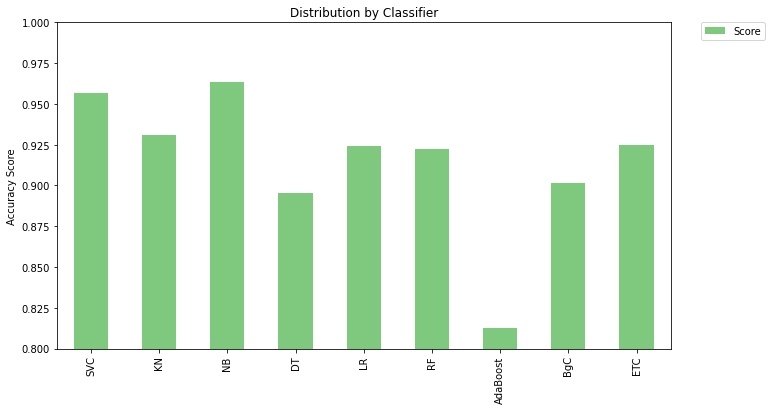

In [42]:
df.plot(kind='bar', ylim=(0.8,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.Classifier)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Stemmer

In [43]:
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

text_feat = clickbait['text'].apply(stemmer)
features = vectorizer.fit_transform(text_feat)

In [44]:
clickbait_train, clickbait_test, label_train, label_test = train_test_split(features, clickbait['label'], test_size=0.2,
                                                             stratify=clickbait['label'], random_state=random)


In [45]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, clickbait_train, label_train)
    pred = predict_labels(v,clickbait_test)
    pred_scores.append((k, accuracy_score(label_test,pred)))

In [46]:
df2 = pd.DataFrame(pred_scores, columns=['Classifier', 'Score2'])
df = pd.concat([df,df2['Score2']],axis=1)
df

,Classifier,Score,Score2
0,SVC,0.956597,0.969618
1,KN,0.930729,0.948264
2,NB,0.963542,0.970833
3,DT,0.895660,0.923958
4,LR,0.924479,0.954167
5,RF,0.922396,0.954167
6,AdaBoost,0.812500,0.912674
7,BgC,0.901563,0.936111
8,ETC,0.924826,0.947049


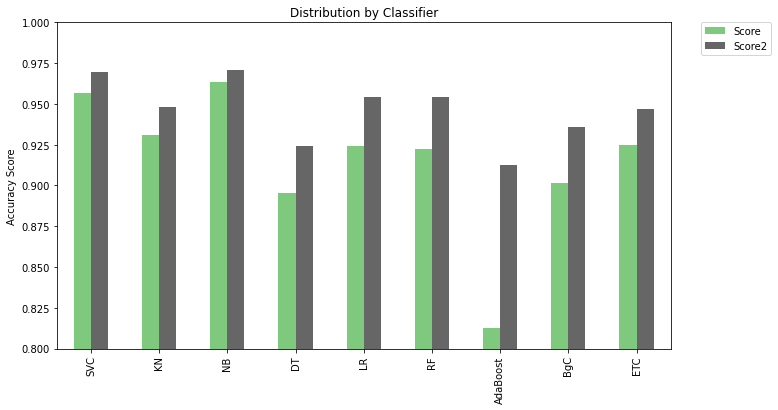

In [47]:
df.plot(kind='bar', ylim=(0.8,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.Classifier)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Voting classifier

In [48]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('BgC', bc), ('ETC', etc), ('RF', rfc), ('Ada', abc)], voting='soft')

eclf.fit(clickbait_train, label_train)

pred = eclf.predict(clickbait_test)

print(accuracy_score(label_test,pred))
print(confusion_matrix(label_test,pred))

0.9520833333333333
[[2751  142]
 [ 134 2733]]


### Naive baiyes model gives the best accuracy and hence will be used for predictions on the unseen test set.

In [37]:
test_set = pd.read_csv('clickbait_hold_X.csv',sep='\t',names=["text",])
test_set["text"] = test_set["text"].apply(lambda x: x.lower())
test_set.head(), test_set.shape

(                                                text
 0  how to make the ultimate spaghetti with red sauce
 1  soviet human rights activist yelena bonner die...
 2  someone calculated how much money jim spent pr...
 3  demonstrators clash with police in algeria aft...
 4  this color quiz will tell you which husky shou...,
 (3200, 1))

In [38]:
clickbait_train, label_train = clickbait['text'], clickbait['label']

pipeline

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f7d9a1285e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB(alpha=0.2))])

In [52]:
pipeline.fit(clickbait_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f7d9a1285e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB(alpha=0.2))])

In [53]:
predictions = pipeline.predict(test_set['text'])
predictions

array(['yes', 'no', 'yes', ..., 'no', 'no', 'yes'], dtype='<U3')

In [54]:
predictions_df = pd.DataFrame(predictions)
predictions_df[0] = predictions_df[0].apply(lambda x: 0 if x=='no' else 1)
predictions_df.to_csv('Yadav_AkashKumar_1620629_Predictions.csv', index=False)

In [56]:
predictions_df

,0
0,1
1,0
2,1
3,0
4,1
...,...
3195,0
3196,0
3197,0
3198,0
